# <center> Multi-Class Prediction of Obesity Risk </center>
<center> Author: Morariu Tudor </center>

## Pas 1: Citirea si Procesarea Datelor

In [133]:
import pandas as pd
pd.set_option('display.max_columns', None)

data = pd.read_csv("train.csv");

display(data);

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


Pentru fircare coloana trebuie sa transform din *object* → *int*. 

In [134]:
Gender_map = {
    "Male": 1,
    "Female": 0
}

yes_no_map = {
    "yes": 1,
    "no" : 0
}

CAEC_map = {
    'no': 1,
    'Sometimes': 2,
    'Frequently': 3,
    'Always': 4
}

CALC_map = {
    'no': 1,
    'Sometimes': 2,
    'Frequently': 3
}

MTRANS_map = {
    'Automobile': 1,
    'Public_Transportation': 2,
    'Motorbike': 3,
    'Bike': 4,
    'Walking': 5
}

NObeyesdad_map = {
    'Insufficient_Weight': 1,
    'Normal_Weight': 2,
    'Overweight_Level_I': 3,
    'Overweight_Level_II': 4,
    'Obesity_Type_I': 5,
    'Obesity_Type_II': 6,
    'Obesity_Type_III': 7
}



Functia *LabelEncoder* din *sklearn* nu este buna pentru acesta problema pentru ca va codifica **yes**: $0$ si **no**: $1$ pe o coloana si pe alta **yes**: $1$ si **no**: $0$ in functie de prima aparitie. 

Am definit cateva map-uri cu valorile dataset-ului in functie de ce "severitate" au. Spre exemplu **Motorbike**: $3$ si **Walking**: $5$ pentru ca un om care merge are exercita mai mult efort decat un om care merge pe motocicleta.

In [135]:
data["Gender"] = data["Gender"].apply(lambda x: Gender_map[x]);
data["family_history_with_overweight"] = data["family_history_with_overweight"].apply(lambda x: yes_no_map[x]);
data["FAVC"] = data["FAVC"].apply(lambda x: yes_no_map[x]);
data["CAEC"] = data["CAEC"].apply(lambda x: CAEC_map[x]);
data["SMOKE"] = data["SMOKE"].apply(lambda x: yes_no_map[x]);
data["SCC"] = data["SCC"].apply(lambda x: yes_no_map[x]);
data["CALC"] = data["CALC"].apply(lambda x: CALC_map[x]);
data["MTRANS"] = data["MTRANS"].apply(lambda x: MTRANS_map[x]);
data["NObeyesdad"] = data["NObeyesdad"].apply(lambda x: NObeyesdad_map[x]);

display(data.head(3));

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,2,2,4
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,3,0,2.000000,0,1.000000,1.000000,1,1,2
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,1,2,1


### Pas 2: Pentru a intelege mai bine datasetul voi plota matricea de corelatie

<AxesSubplot:>

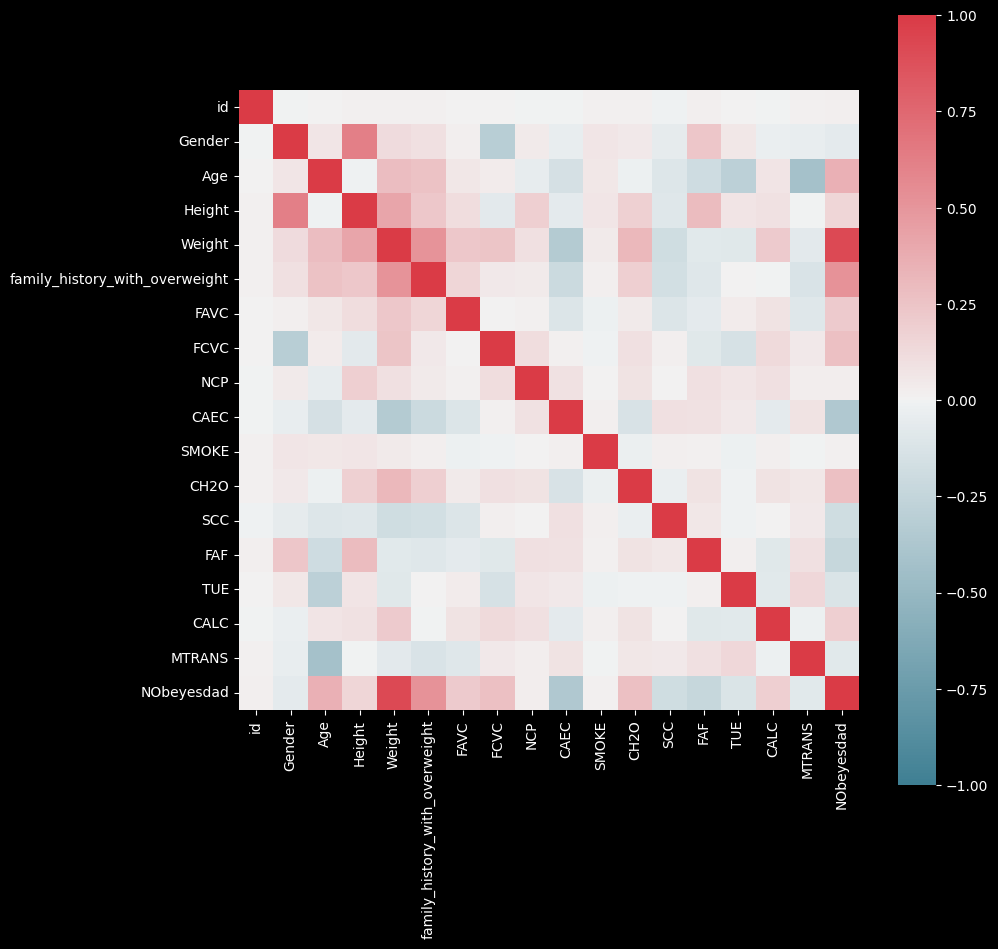

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')


f, ax = plt.subplots(figsize=(10, 10))
corr = data.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0, square=True, ax=ax)

*   **Obs**: Raspunsul este corelat puternic cu **Weight** (evident).

### Pas 2.1: Plotare $2D$ folosind PCA

In [ ]:
from sklearn.decomposition import PCA

f, ax = plt.subplots(figsize=(10, 10))

pca2d = PCA(n_components=2);
points2d = pca2d.fit_transform(data);


colors2d = ['#003bff', '#05ff00', '#ffb4b4', '#ff8888', '#ff6565', '#fe4545', '#ff0000']
#         Underweight,  Normal,  Overweight1,  Overweight2,  Obese1,  Obese2,  Obese3.

list_dateframe_index = data.index;
iterator = 0;

points2d_under_x = [];
points2d_under_y = [];

points2d_norml_x = [];
points2d_norml_y = [];

points2d_over1_x = [];
points2d_over1_y = [];

points2d_over2_x = [];
points2d_over2_y = [];

points2d_obst1_x = [];
points2d_obst1_y = [];

points2d_obst2_x = [];
points2d_obst2_y = [];

points2d_obst3_x = [];
points2d_obst3_y = [];

for x, y in points2d:
    #print(data.loc[list_dateframe_index[iterator], "NObeyesdad"]);
    if(data.loc[list_dateframe_index[iterator], "NObeyesdad"] == 1):
        points2d_under_x.append(x);
        points2d_under_y.append(y);
    
    if(data.loc[list_dateframe_index[iterator], "NObeyesdad"] == 2):
        points2d_norml_x.append(x);
        points2d_norml_y.append(y);
    
    if(data.loc[list_dateframe_index[iterator], "NObeyesdad"] == 3):
        points2d_over1_x.append(x);
        points2d_over1_y.append(y);
    
    if(data.loc[list_dateframe_index[iterator], "NObeyesdad"] == 4):
        points2d_over2_x.append(x);
        points2d_over2_y.append(y);
    
    if(data.loc[list_dateframe_index[iterator], "NObeyesdad"] == 5):
        points2d_obst1_x.append(x);
        points2d_obst1_y.append(y);
    
    if(data.loc[list_dateframe_index[iterator], "NObeyesdad"] == 6):
        points2d_obst2_x.append(x);
        points2d_obst2_y.append(y);
    
    if(data.loc[list_dateframe_index[iterator], "NObeyesdad"] == 7):
        points2d_obst3_x.append(x);
        points2d_obst3_y.append(y);
    iterator += 1;

points2d_size = 0.5;

ax.scatter(points2d_under_x, points2d_under_y, c=colors2d[0], s=points2d_size);
ax.scatter(points2d_norml_x, points2d_norml_y, c=colors2d[1], s=points2d_size);
ax.scatter(points2d_over1_x, points2d_over1_y, c=colors2d[2], s=points2d_size);
ax.scatter(points2d_over2_x, points2d_over2_y, c=colors2d[3], s=points2d_size);
ax.scatter(points2d_obst1_x, points2d_obst1_y, c=colors2d[4], s=points2d_size);
ax.scatter(points2d_obst2_x, points2d_obst2_y, c=colors2d[5], s=points2d_size);
ax.scatter(points2d_obst3_x, points2d_obst3_y, c=colors2d[6], s=points2d_size);

plt.show();


<img title="2D PCA plot" src="./2d_plot_PCA.png" width="900">


### Pas 2.2: Plot $3D$ cu PCA

In [ ]:

fig = plt.figure(figsize=(10, 10))

pca3d = PCA(n_components=3);
points2d = pca3d.fit_transform(data);


colors2d = ['#003bff', '#05ff00', '#ffb4b4', '#ff8888', '#ff6565', '#fe4545', '#ff0000']
#         Underweight,  Normal,  Overweight1,  Overweight2,  Obese1,  Obese2,  Obese3.

list_dateframe_index = data.index;
iterator = 0;

points3d_under_x = [];
points3d_under_y = [];
points3d_under_z = [];


points3d_norml_x = [];
points3d_norml_y = [];
points3d_norml_z = [];

points3d_over1_x = [];
points3d_over1_y = [];
points3d_over1_z = [];

points3d_over2_x = [];
points3d_over2_y = [];
points3d_over2_z = [];

points3d_obst1_x = [];
points3d_obst1_y = [];
points3d_obst1_z = [];

points3d_obst2_x = [];
points3d_obst2_y = [];
points3d_obst2_z = [];

points3d_obst3_x = [];
points3d_obst3_y = [];
points3d_obst3_z = [];

for x, y, z in points2d:
    #print(data.loc[list_dateframe_index[iterator], "NObeyesdad"]);
    if(data.loc[list_dateframe_index[iterator], "NObeyesdad"] == 1):
        points3d_under_x.append(x);
        points3d_under_y.append(y);
        points3d_under_z.append(z);
    
    if(data.loc[list_dateframe_index[iterator], "NObeyesdad"] == 2):
        points3d_norml_x.append(x);
        points3d_norml_y.append(y);
        points3d_norml_z.append(z);
    
    if(data.loc[list_dateframe_index[iterator], "NObeyesdad"] == 3):
        points3d_over1_x.append(x);
        points3d_over1_y.append(y);
        points3d_over1_z.append(z);
    
    if(data.loc[list_dateframe_index[iterator], "NObeyesdad"] == 4):
        points3d_over2_x.append(x);
        points3d_over2_y.append(y);
        points3d_over2_z.append(z);
    
    if(data.loc[list_dateframe_index[iterator], "NObeyesdad"] == 5):
        points3d_obst1_x.append(x);
        points3d_obst1_y.append(y);
        points3d_obst1_z.append(z);
    
    if(data.loc[list_dateframe_index[iterator], "NObeyesdad"] == 6):
        points3d_obst2_x.append(x);
        points3d_obst2_y.append(y);
        points3d_obst2_z.append(z);
    
    if(data.loc[list_dateframe_index[iterator], "NObeyesdad"] == 7):
        points3d_obst3_x.append(x);
        points3d_obst3_y.append(y);
        points3d_obst3_z.append(z);
    
    iterator += 1;

points3d_size = 0.5;

init_views = [(0, 0)];

for i in range(4):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    #ax.init_view(init_views[0]);
    ax.scatter(points3d_under_x, points3d_under_y, points3d_under_z, c=colors2d[0], s=points3d_size);
    ax.scatter(points3d_norml_x, points3d_norml_y, points3d_norml_z, c=colors2d[1], s=points3d_size);
    ax.scatter(points3d_over1_x, points3d_over1_y, points3d_over1_z, c=colors2d[2], s=points3d_size);
    ax.scatter(points3d_over2_x, points3d_over2_y, points3d_over2_z, c=colors2d[3], s=points3d_size);
    ax.scatter(points3d_obst1_x, points3d_obst1_y, points3d_obst1_z, c=colors2d[4], s=points3d_size);
    ax.scatter(points3d_obst2_x, points3d_obst2_y, points3d_obst2_z, c=colors2d[5], s=points3d_size);
    ax.scatter(points3d_obst3_x, points3d_obst3_y, points3d_obst3_z, c=colors2d[6], s=points3d_size);




plt.show();

####### Codul de mai sus nu reproduce poza din markdown.



<img title="3D PCA plot" src="./3d_plot_PCA.png" width="900">


*   **Obs**: Din plot-urile de mai sus se observa o separare clara a feature-urilor.

## Pas 3: Train-Test Split

In [139]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3);

## Pas 4: Alegerea si Antrenarea Modelului

In [140]:
import warnings
warnings.filterwarnings("ignore")

Pentru model putem folosi un **Classifier**.

In [141]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=100000, tol=1e-8, learning_rate_init=1e-4);
model.fit(train.drop(columns=["NObeyesdad"]), train["NObeyesdad"]);

print("Scor: ", '%.3f' % model.score(test.drop(columns=["NObeyesdad"]), test["NObeyesdad"]))

Scor:  0.622


Sau un **Decision Forest**.

In [142]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=100);
model.fit(train.drop(columns=["NObeyesdad"]), train["NObeyesdad"]);

print("Scor: ", '%.3f' % model.score(test.drop(columns=["NObeyesdad"]), test["NObeyesdad"]))

Scor:  0.903


Sau un **Support Vector Classifier**.

In [143]:
from sklearn.svm import SVC

model = SVC(degree=6, max_iter=100000);
model.fit(train.drop(columns=["NObeyesdad"]), train["NObeyesdad"]);

print("Scor: ", '%.3f' % model.score(test.drop(columns=["NObeyesdad"]), test["NObeyesdad"]))

Scor:  0.189


Sau cu **K-Means**

In [144]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=7, init='k-means++', max_iter=1000, tol=1e-8, algorithm='elkan')
model.fit(train.drop(columns=["NObeyesdad"]), train["NObeyesdad"]);

print("Scor: ", '%.3f' % model.score(test.drop(columns=["NObeyesdad"]), test["NObeyesdad"]))

Scor:  -4519886758.297


Sau cu **Logistic Regresion**

In [145]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100000)
model.fit(train.drop(columns=["NObeyesdad"]), train["NObeyesdad"]);

print("Scor: ", '%.3f' % model.score(test.drop(columns=["NObeyesdad"]), test["NObeyesdad"]))

Scor:  0.749


### Pas 5: Scoruri modele incercate


<table>

<tr>
<th>Model</th>
<th>Scor</th>
<th>Note</th>
</tr>

<tr>
<td>RandomForestClassifier (max depth = 100)</td>
<td>0.903</td>
<td>Daca ne uitam pe graficul 3D, majoritatea datelor pot fi delimitate de anumite conditii fixe pe axele PCA-ului</td>
</tr>

<tr>
<td>Logistic Regression </td>
<td>0.749</td>
<td>Scorul este surprinzator de mare.</td>
</tr>

<tr>
<td>MLPClassifier (learning rate = 1e-4)</td>
<td>0.622</td>
<td>Scorul este oarecum de astepat. Daca ne uitam pe grafice avem destul de multe date care sunt outline-eri.</td>
</tr>



<tr>
<td>Support Vector Classifier (grad polynom = 3, 5, 6) </td>
<td>0.189</td>
<td>SVC-ul iti determina un polinom de grad dat pentru a se "fixa" peste date. Datele noastre au mai multe dimensiuni, scorul modelului fiind in consecinta mic.</td>
</tr>

<tr>
<td>K-Means </td>
<td>-4519886758.297</td>
<td>K-Means determina centroidele unor clustere. In ploturi clusterele is alineate pe o "dreapta", nu circular astfel eroarea este mare.</td>
</tr>

</table>


## Future Work

Cateva imbunatatiri pot include:

* Folosire dateset-ului original, din care a fost facut training data-ul.

* Micsorarea *learning rate*-ului si a *tol*-ului.

* Adaugarea in training data un dataset suplimentar, spre exemplu rate obezitatii in functie de varsta.

* Incercarea mai multor modele precum **K-Nearest-Neighbors** sau un **Neural-Network**.

* Modelul de **Logistic Regression** nu converge din cauza parametrului *max_iter* care este prea mic.